In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.utils import to_categorical
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
base_dir = './gdrive/My Drive/'

### Slide Patch

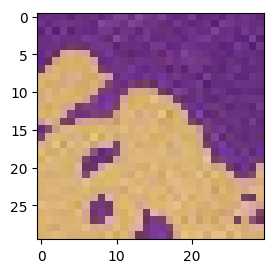

In [5]:
slide_patch = plt.imread(os.path.join(base_dir, 'heat/patch.jpg'))
mask_patch = plt.imread(os.path.join(base_dir, 'heat/mask.jpg'))
plt.figure(figsize=(3,3), dpi=100)
plt.imshow(slide_patch)
plt.imshow(mask_patch, cmap='viridis', alpha=0.5)

### Load Predications

In [0]:
#nn_test_proba_7 = np.load(os.path.join(base_dir, 'heat/nn_test_lv7.npy'))
#rf_test_proba_7 = np.load(os.path.join(base_dir, 'heat/rf_test_lv7.npy'))
nn_heat_proba_7 = np.load(os.path.join(base_dir, 'heat/rf_heat_lv7.npy'))
rf_heat_proba_7 = np.load(os.path.join(base_dir, 'heat/rf_heat_lv7.npy'))

In [0]:
#nn_test_proba_5 = np.load(os.path.join(base_dir, 'heat/nn_test_lv5.npy'))
#rf_test_proba_5 = np.load(os.path.join(base_dir, 'heat/rf_test_lv5.npy'))
nn_heat_proba_5 = np.load(os.path.join(base_dir, 'heat/nn_heat_lv5.npy'))
rf_heat_proba_5 = np.load(os.path.join(base_dir, 'heat/rf_heat_lv5.npy'))

In [0]:
rf_heat_proba_5 = np.array([1-i for i in rf_heat_proba_5])

In [0]:
heat_gt = np.load(os.path.join(base_dir, 'heat/heat_gt.npy'))

## Ensemble Heatset Evaluation

In [0]:
def to_label(proba, thld=0.5):
  label = np.array([1 if p >= thld else 0 for p in proba])
  return label

In [0]:
nn_heat_label_7 = to_label(nn_heat_proba_7, 0.3)
nn_heat_label_5 = to_label(nn_heat_proba_5, 0.4)
rf_heat_label_7 = to_label(rf_heat_proba_7, 0.5)
rf_heat_label_5 = to_label(rf_heat_proba_5, 0.8)


In [142]:
print(classification_report(heat_gt, nn_heat_label_7))

              precision    recall  f1-score   support

           0       0.41      0.22      0.29       431
           1       0.50      0.71      0.59       469

   micro avg       0.48      0.48      0.48       900
   macro avg       0.46      0.47      0.44       900
weighted avg       0.46      0.48      0.44       900



In [143]:
print(classification_report(heat_gt, nn_heat_label_5))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       431
           1       0.67      0.75      0.70       469

   micro avg       0.67      0.67      0.67       900
   macro avg       0.67      0.67      0.67       900
weighted avg       0.67      0.67      0.67       900



In [144]:
print(classification_report(heat_gt, rf_heat_label_7))

              precision    recall  f1-score   support

           0       0.43      0.75      0.54       431
           1       0.26      0.08      0.12       469

   micro avg       0.40      0.40      0.40       900
   macro avg       0.34      0.41      0.33       900
weighted avg       0.34      0.40      0.32       900



In [145]:
print(classification_report(heat_gt, rf_heat_label_5))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65       431
           1       0.68      0.80      0.74       469

   micro avg       0.70      0.70      0.70       900
   macro avg       0.71      0.69      0.69       900
weighted avg       0.70      0.70      0.69       900



In [125]:
plt.figure(figsize=(3,3), dpi=100)
#plt.imshow(slide_patch)

heat_nn7 = nn_heat_proba_7.reshape((30, 30))
heat_nn5 = nn_heat_proba_5.reshape((30, 30))
heat_rf7 = rf_heat_proba_7.reshape((30, 30))
heat_rf5 = rf_heat_proba_5.reshape((30, 30))
#plt.imshow(heat_nn7, cmap='viridis', alpha=0.9)
#plt.imshow(heat_nn5, cmap='viridis', alpha=0.9)
#plt.savefig(os.path.join(base_dir, 'heat/heat_nn_lv7.png'))

<Figure size 300x300 with 0 Axes>

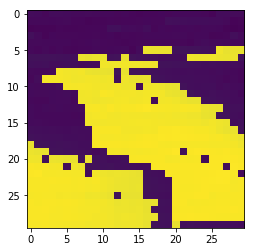

In [157]:
ens_proba = nn_heat_proba_7 * 0.1 + nn_heat_proba_5 * 0.4 + rf_heat_proba_7 * 0.1 + rf_heat_proba_5 * 0.4
ens_label = to_label(ens_proba, 0.6)
plt.imshow(ens_proba.reshape(30,30), cmap='viridis', alpha=0.9)
plt.imshow(ens_label.reshape(30,30), cmap='viridis', alpha=0.9)

In [158]:
print(classification_report(heat_gt, ens_label))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       431
           1       0.69      0.71      0.70       469

   micro avg       0.68      0.68      0.68       900
   macro avg       0.68      0.68      0.68       900
weighted avg       0.68      0.68      0.68       900



In [0]:
a0 = np.flipud(heat_nn7)
b0 = np.flipud(heat_rf7)
a = np.flipud(nn_heat_label_7.reshape(30,30))
b = np.flipud(rf_heat_label_7.reshape(30,30))

In [0]:
heats = [a0, b0, heat_nn5, heat_rf5, ens_proba.reshape(30,30), 
         a, b, nn_heat_label_5.reshape(30,30), rf_heat_label_5.reshape(30,30),
        ens_label.reshape(30,30)]

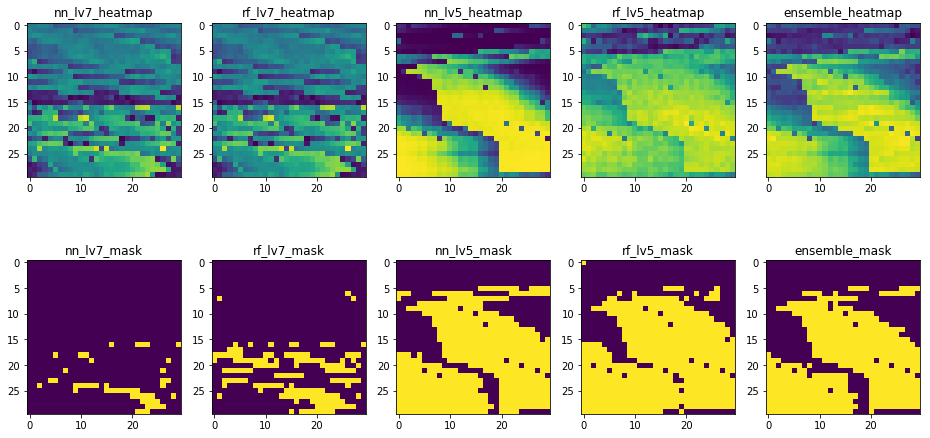

In [165]:
w=10
h=10
fig=plt.figure(figsize=(16, 8))
columns = 5
rows = 2
titles = ['nn_lv7_heatmap', 'rf_lv7_heatmap', 'nn_lv5_heatmap', 'rf_lv5_heatmap', 'ensemble_heatmap',
          'nn_lv7_mask', 'rf_lv7_mask', 'nn_lv5_mask', 'rf_lv5_mask', 'ensemble_mask']
for i in range(1, columns*rows+1):
    img = heats[i-1]
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(titles[i-1])
    plt.imshow(img)
plt.show()
fig.savefig(os.path.join(base_dir, 'heat/heat_all_ens.png'))

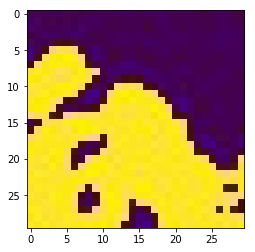

In [162]:
plt.imshow(mask_patch, cmap='viridis', alpha=1.0)
plt.savefig(os.path.join(base_dir, 'heat/heat_ground.png'))